Type: <class 'dict'>
Length: 1046

Sample key-value pairs:
0: 0
1037: 1
2158: 2
2003: 3
15927: 4
1999: 5
2601: 6
3061: 7
1996: 8
2690: 9


/project/ag-jafra/Souptik/CMG_New/Experiments/envs/CMG_new/lib/python3.10/site-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(



Sample tokens:
ID 0 → Token '[PAD]' → Custom index 0
ID 1037 → Token 'a' → Custom index 1
ID 2158 → Token 'man' → Custom index 2
ID 2003 → Token 'is' → Custom index 3
ID 15927 → Token 'crawling' → Custom index 4
ID 1999 → Token 'in' → Custom index 5
ID 2601 → Token 'dark' → Custom index 6
ID 3061 → Token 'standing' → Custom index 7
ID 1996 → Token 'the' → Custom index 8
ID 2690 → Token 'middle' → Custom index 9

Value distribution:
count    1046.000000
mean      522.500000
std       302.098494
min         0.000000
25%       261.250000
50%       522.500000
75%       783.750000
max      1045.000000
Name: values, dtype: float64


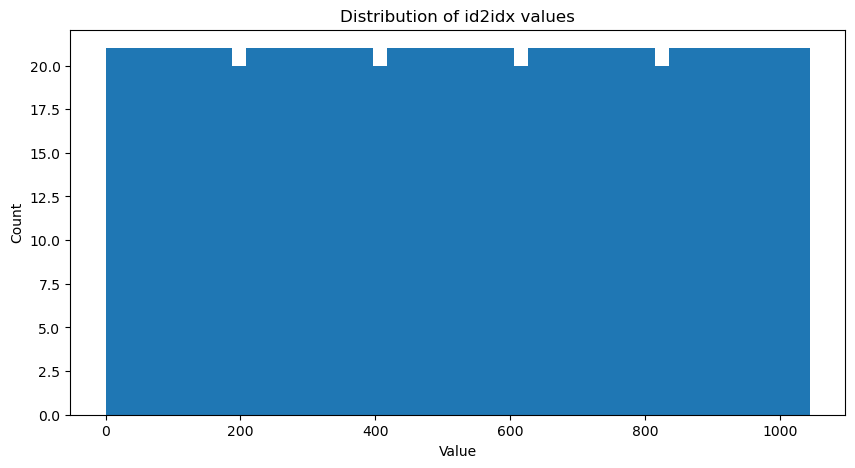

In [1]:
import pickle
import pandas as pd

# Load the pickle file
with open('/project/ag-jafra/Souptik/VGGSoundAVEL/CMG/cnt.pkl', 'rb') as fp:
    id2idx = pickle.load(fp)

# Print the type and length of the dictionary
print(f"Type: {type(id2idx)}")
print(f"Length: {len(id2idx)}")

# Show some example entries
print("\nSample key-value pairs:")
items = list(id2idx.items())[:10]  # First 10 items
for key, value in items:
    print(f"{key}: {value}")

# If it's a dictionary mapping from BERT token IDs to custom indices
# Let's try to see what some of the tokens are
if isinstance(list(id2idx.keys())[0], int):  # Checking if keys are integers
    from transformers import BertTokenizer
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    
    print("\nSample tokens:")
    for token_id, idx in items:
        token = tokenizer.convert_ids_to_tokens(token_id)
        print(f"ID {token_id} → Token '{token}' → Custom index {idx}")

# Distribution of values if it's a mapping
if isinstance(list(id2idx.values())[0], int):  # Checking if values are integers
    values = list(id2idx.values())
    df = pd.DataFrame({'values': values})
    print("\nValue distribution:")
    print(df['values'].describe())
    
    # Optional: histogram of value distribution
    try:
        import matplotlib.pyplot as plt
        plt.figure(figsize=(10, 5))
        plt.hist(values, bins=50)
        plt.title('Distribution of id2idx values')
        plt.xlabel('Value')
        plt.ylabel('Count')
        plt.show()
    except ImportError:
        print("Matplotlib not available for histogram")